In [258]:
import yfinance as yf

In [259]:
tickers = ['BAC', 'JPM', 'C', 'QQQ', '^GSPC']
start_date = '2020-01-01'
end_date = '2025-01-01'

df = yf.download(tickers, start = start_date, end = end_date)['Close']
df

[*********************100%***********************]  5 of 5 completed


Ticker,BAC,C,JPM,QQQ,^GSPC
Date,,,,,
2020-01-02,31.092312,66.132507,120.154716,209.091064,3257.850098
2020-01-03,30.446739,64.886871,118.569054,207.175827,3234.850098
2020-01-06,30.403116,64.683304,118.474815,208.510681,3246.280029
2020-01-07,30.202469,64.121574,116.460663,208.481644,3237.179932
2020-01-08,30.507809,64.610054,117.369171,210.048676,3253.050049
...,...,...,...,...,...
2024-12-24,43.843319,69.952347,238.440521,528.577271,6040.040039
2024-12-26,44.011265,70.297180,239.257263,528.218201,6037.589844
2024-12-27,43.803802,69.952347,237.318710,521.196533,5970.839844


In [260]:
# Feature Engineering
df['BAC(t-1)'] = df['BAC'].shift(1)
df['C(t-1)'] = df['C'].shift(1)
df['JPM(t-1)'] = df['JPM'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)

# Moving average
df['BAC_MA_5'] = df['BAC'].rolling(window = 5).mean()
df['C_MA_5'] = df['C'].rolling(window = 5).mean()
df['JPM_MA_5'] = df['JPM'].rolling(window = 5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window = 5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window = 5).mean()

df['Target'] = df['BAC'].shift(-1)
df =df.dropna()
df

Ticker,BAC,C,JPM,QQQ,^GSPC,BAC(t-1),C(t-1),JPM(t-1),QQQ(t-1),^GSPC(t-1),BAC_MA_5,C_MA_5,JPM_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-08,30.507809,64.610054,117.369171,210.048676,3253.050049,30.202469,64.121574,116.460663,208.481644,3237.179932,30.530489,64.886862,118.205684,208.661578,3245.842041,30.560152
2020-01-09,30.560152,65.196236,117.797722,211.828522,3274.699951,30.507809,64.610054,117.369171,210.048676,3253.050049,30.424057,64.699608,117.734285,209.209070,3249.212012,30.307154
2020-01-10,30.307154,64.520500,116.623520,211.286804,3265.350098,30.560152,65.196236,117.797722,211.828522,3274.699951,30.396140,64.626334,117.345178,210.031265,3255.312012,30.586321
2020-01-13,30.586321,65.660286,117.592010,213.724411,3288.129883,30.307154,64.520500,116.623520,211.286804,3265.350098,30.432781,64.821730,117.168617,211.074011,3263.681982,30.813154
2020-01-14,30.813154,66.686096,118.963348,212.882874,3283.149902,30.586321,65.660286,117.592010,213.724411,3288.129883,30.554918,65.334634,117.669154,211.954257,3272.875977,30.246080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,43.359245,68.740494,234.583115,521.505737,5974.069824,43.635857,68.169060,233.805740,516.473877,5930.850098,43.465939,68.301080,231.774692,519.563428,5938.954004,43.843319
2024-12-24,43.843319,69.952347,238.440521,528.577271,6040.040039,43.359245,68.740494,234.583115,521.505737,5974.069824,43.333559,68.277432,232.552075,518.570557,5936.840039,44.011265
2024-12-26,44.011265,70.297180,239.257263,528.218201,6037.589844,43.843319,69.952347,238.440521,528.577271,6040.040039,43.541019,68.913899,235.065295,521.355579,5969.925977,43.803802


In [261]:
df.columns

Index(['BAC', 'C', 'JPM', 'QQQ', '^GSPC', 'BAC(t-1)', 'C(t-1)', 'JPM(t-1)',
       'QQQ(t-1)', '^GSPC(t-1)', 'BAC_MA_5', 'C_MA_5', 'JPM_MA_5', 'QQQ_MA_5',
       '^GSPC_MA_5', 'Target'],
      dtype='object', name='Ticker')

In [262]:
import statsmodels.api as sm

X = df[['BAC(t-1)', 'C(t-1)', 'JPM(t-1)',
       'QQQ(t-1)', '^GSPC(t-1)', 'BAC_MA_5', 'C_MA_5', 'JPM_MA_5', 'QQQ_MA_5',
       '^GSPC_MA_5']]

Y = df['Target']

X_const = sm.add_constant(X)
model = sm.OLS(Y,X_const).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     7536.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:47:23   Log-Likelihood:                -1590.3
No. Observations:                1253   AIC:                             3203.
Df Residuals:                    1242   BIC:                             3259.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4656      0.387      1.203      0.229      -0.294       1.225
BAC(t-1)       0.7473      0.112      6.660      0.000       0.527       0.967
C(t-1)         0.0293      0.056      0.524      0.600      -0.080       0.139
JPM(t-1)       0.0238      0.027      0.885      0.376      -0.029       0.077
QQQ(t-1)       0.0392      0.021      1.872      0.061      -0.002       0.080
^GSPC(t-1)    -0.0059      0.003     -2.323      0.020      -0.011      -0.001
BAC_MA_5       0.2497      0.113      2.203      0.028       0.027       0.472
C_MA_5        -0.0303      0.056     -0.539      0.590      -0.141       0.080
JPM_MA_5      -0.0259      0.027     -0.956      0.339      -0.079       0.027
QQQ_MA_5      -0.0314      0.021     -1.492      0.136      -0.073       0.010
^GSPC_MA_5     0.0053      0.003      2.065      0.039       0.000       0.010
==============================================================================
Omnibus:                       55.966   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.545
Skew:                          -0.096   Prob(JB):                     2.52e-37
Kurtosis:                       4.786   Cond. No.                     9.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [263]:
import statsmodels.api as sm

# Dropping C(t-1), C_MA_5, JPM_MA_5, JPM(t-1), QQQ_MA_5, ^GSPC_MA_5
X = df[['BAC(t-1)','QQQ(t-1)', '^GSPC(t-1)', 'BAC_MA_5']]
Y = df['Target']

X_const = sm.add_constant(X)

# Training the model
model = sm.OLS(Y, X_const).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.883e+04
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:47:23   Log-Likelihood:                -1593.8
No. Observations:                1253   AIC:                             3198.
Df Residuals:                    1248   BIC:                             3223.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5862      0.216      2.716      0.007       0.163       1.010
BAC(t-1)       0.7130      0.051     14.074      0.000       0.614       0.812
QQQ(t-1)       0.0077      0.002      4.002      0.000       0.004       0.011
^GSPC(t-1)    -0.0007      0.000     -3.137      0.002      -0.001      -0.000
BAC_MA_5       0.2821      0.051      5.556      0.000       0.183       0.382
==============================================================================
Omnibus:                       59.181   Durbin-Watson:                   0.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.705
Skew:                          -0.122   Prob(JB):                     5.76e-40
Kurtosis:                       4.844   Cond. No.                     3.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [264]:
df.columns

Index(['BAC', 'C', 'JPM', 'QQQ', '^GSPC', 'BAC(t-1)', 'C(t-1)', 'JPM(t-1)',
       'QQQ(t-1)', '^GSPC(t-1)', 'BAC_MA_5', 'C_MA_5', 'JPM_MA_5', 'QQQ_MA_5',
       '^GSPC_MA_5', 'Target'],
      dtype='object', name='Ticker')

In [265]:
import pandas as pd

df_train_predict = pd.DataFrame()
df_train_predict['Actual'] = df['Target']
df_train_predict['Predicted'] = model.predict(X_const)
df_train_predict

,Actual,Predicted
Date,,
2020-01-08,30.560152,30.047410
2020-01-09,30.307154,30.235921
2020-01-10,30.586321,30.263733
2020-01-13,30.813154,30.096127
2020-01-14,30.246080,30.332274
...,...,...
2024-12-23,43.843319,43.738642
2024-12-24,44.011265,43.512181
2024-12-26,43.803802,43.923588


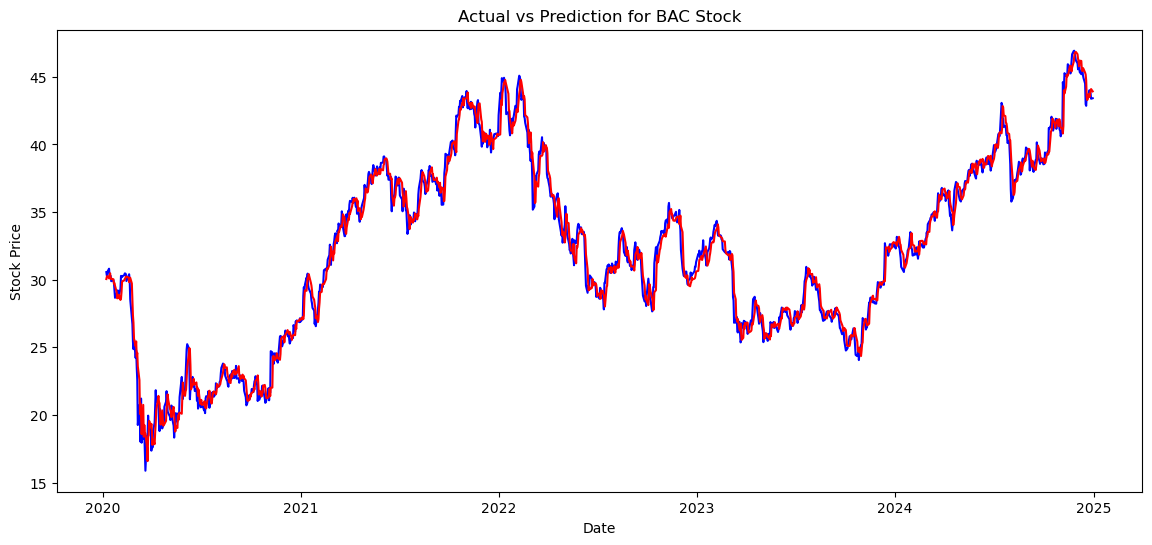

In [266]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))
plt.plot(df_train_predict.index, df_train_predict['Actual'], label = 'Actual', color = 'blue')
plt.plot(df_train_predict.index, df_train_predict['Predicted'], label = 'Actual', color = 'red')
plt.title('Actual vs Prediction for BAC Stock')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

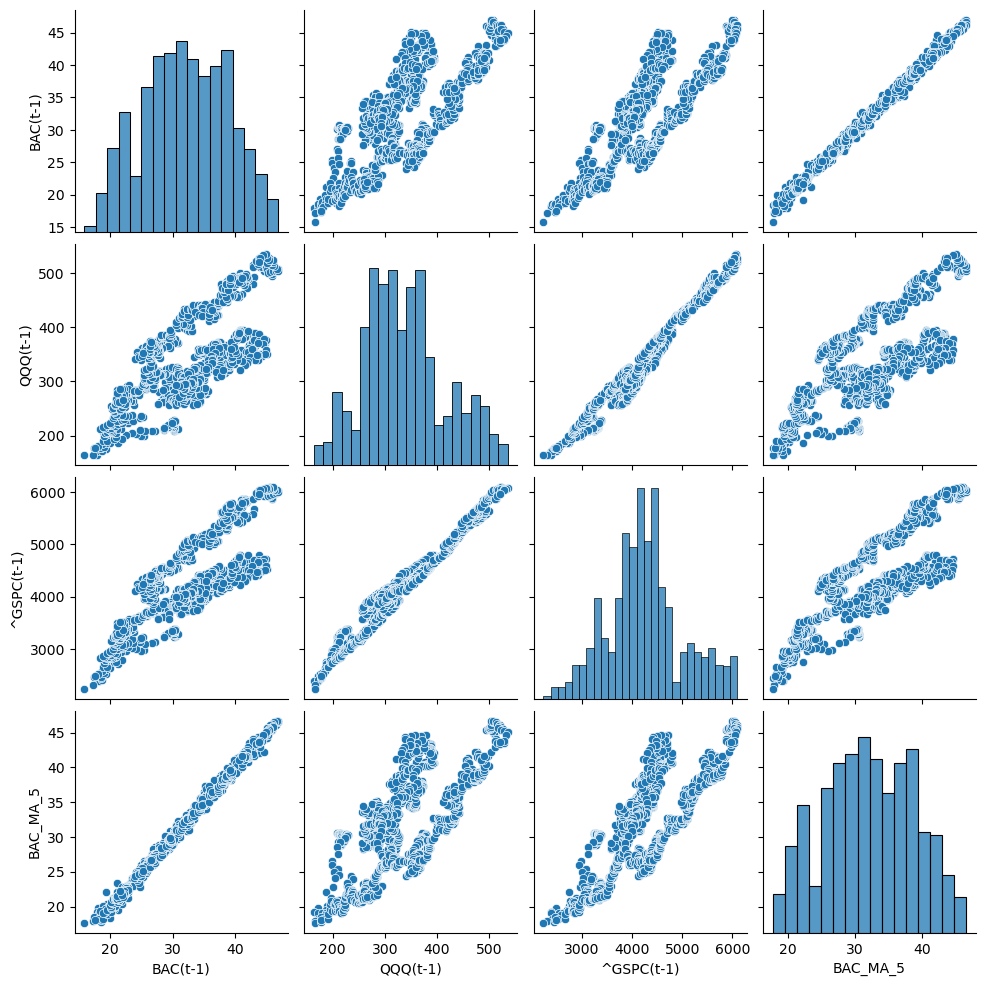

In [267]:
# Verifying assumptions of linear regressions:
# 1) Linearity between dependent and independent variable - Partially MET

import seaborn as sns
df = df[['BAC(t-1)',
       'QQQ(t-1)', '^GSPC(t-1)','BAC_MA_5']]
sns.pairplot(df)

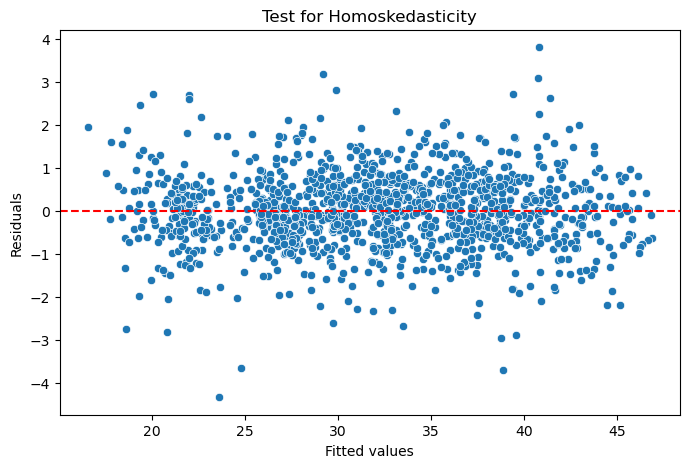

In [268]:
# 2) Homoskedasticity - 

residual = model.resid
fitted = model.fittedvalues

plt.figure(figsize = (8,5))
sns.scatterplot(x = fitted, y = residual)
plt.axhline(0, color = 'red', linestyle ='--')
plt.title('Test for Homoskedasticity')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Since it's a tube like structure - it is homoskedastic - Hence, assumption is met.

In [269]:
# 3) Multicollinearity = VIF(Variance Inflation Factor) 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif =vif[1:]
vif

,Features,VIF
1,BAC(t-1),195.666930
2,QQQ(t-1),38.288421
3,^GSPC(t-1),49.911724
4,BAC_MA_5,194.746251


In [270]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(X.shape[1])]
    return vif

# Assuming X is features DataFrame
X_const = sm.add_constant(X)  # Adding intercept term
vif_df = calculate_vif(X_const).iloc[1:]  # Remove constant/intercept

# Loop to remove features with highest VIF > 10
while vif_df['VIF'].max() > 10:
    max_vif_feature = vif_df.loc[vif_df['VIF'].idxmax(), 'Feature']
    print(f"Removing: {max_vif_feature} with VIF = {vif_df['VIF'].max():.2f}")
    
    X_const = X_const.drop(columns=max_vif_feature)
    vif_df = calculate_vif(X_const).iloc[1:]

print("Final VIFs:")
print(vif_df)

Removing: BAC(t-1) with VIF = 195.67
Removing: ^GSPC(t-1) with VIF = 49.86
Final VIFs:
    Feature       VIF
1  QQQ(t-1)  1.996347
2  BAC_MA_5  1.996347


In [271]:
X_filtered = X.drop(columns=['BAC_MA_5', 'QQQ(t-1)'])
X_const = sm.add_constant(X_filtered)

# Recalculate VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i)
                 for i in range(X_const.shape[1])]

# Drop intercept row for reporting
print(vif_df.iloc[1:])

      Feature       VIF
1    BAC(t-1)  2.622581
2  ^GSPC(t-1)  2.622581


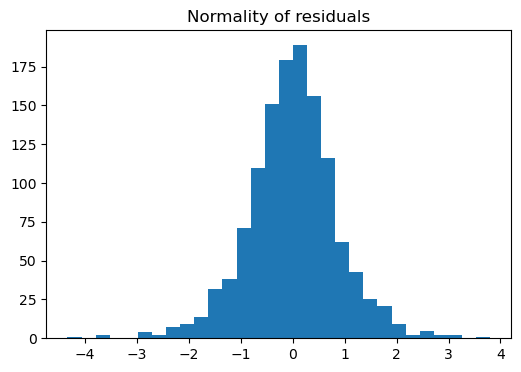

In [290]:
# 4) Test for normality of residuals

plt.figure(figsize = (6,4))
plt.hist(residual, bins = 30)
plt.title('Normality of residuals')
plt.show()

# As the graph represents a bell shaped curve, it is normally distributed.
# Hence, the assumption is met.

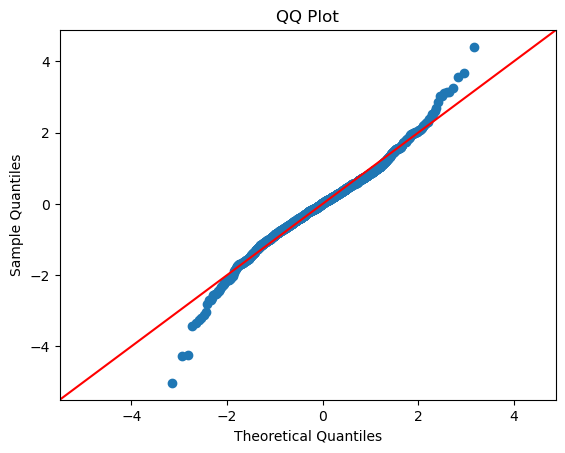

In [283]:
# 4) QQ plot for testing normality of residuals

import statsmodels.api as sm
sm.qqplot(residual, line = '45', fit = True)
plt.title('QQ Plot')
plt.show()

# As most of the part is on the line, the residuals are normally distributed. 
# Hence, the assumption is met.

In [274]:
# 5) Test for Autocorrelation of residuals: Durbin Watson Test

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residual)
dw

# Autocorrelation is present as p value > 0.05

0.8022505911212156

In [284]:
# Stock price prediction for 2025

tickers = ['BAC',
       'QQQ', '^GSPC']
start_date = '2025-01-01'
end_date = '2025-03-31'
df = yf.download(tickers, start = start_date, end = end_date)['Close']
df.head()

[*********************100%***********************]  3 of 3 completed


Ticker,BAC,QQQ,^GSPC
Date,,,
2025-01-02,43.754410,508.898712,5868.549805
2025-01-03,44.268120,517.226929,5942.470215
2025-01-06,44.850983,523.171326,5975.379883
2025-01-07,45.522762,513.835754,5909.029785
2025-01-08,45.651188,513.925537,5918.250000


In [285]:
# Data Engineering

df['BAC(t-1)'] = df['BAC'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)
df['BAC_MA_5'] = df['BAC'].shift(1)
df = df.dropna()
df.head()

Ticker,BAC,QQQ,^GSPC,BAC(t-1),QQQ(t-1),^GSPC(t-1),BAC_MA_5
Date,,,,,,,
2025-01-03,44.268120,517.226929,5942.470215,43.754410,508.898712,5868.549805,43.754410
2025-01-06,44.850983,523.171326,5975.379883,44.268120,517.226929,5942.470215,44.268120
2025-01-07,45.522762,513.835754,5909.029785,44.850983,523.171326,5975.379883,44.850983
2025-01-08,45.651188,513.925537,5918.250000,45.522762,513.835754,5909.029785,45.522762
2025-01-10,44.564491,505.866669,5827.040039,45.651188,513.925537,5918.250000,45.651188


In [286]:
X_test = df[['BAC(t-1)',
       'QQQ(t-1)', '^GSPC(t-1)', 'BAC_MA_5']]
X_test = sm.add_constant(X_test)

df_result = pd.DataFrame()
df_result['Actual'] = df['BAC']
df_result['Predicted'] = model.predict(X_test)
df_result

,Actual,Predicted
Date,,
2025-01-03,44.268120,43.890377
2025-01-06,44.850983,44.413366
2025-01-07,45.522762,45.015878
2025-01-08,45.651188,45.659547
2025-01-10,44.564491,45.781512
2025-01-13,44.515095,44.702621
2025-01-14,45.226387,44.634438
2025-01-15,46.530422,45.333878
2025-01-16,46.075989,46.645061


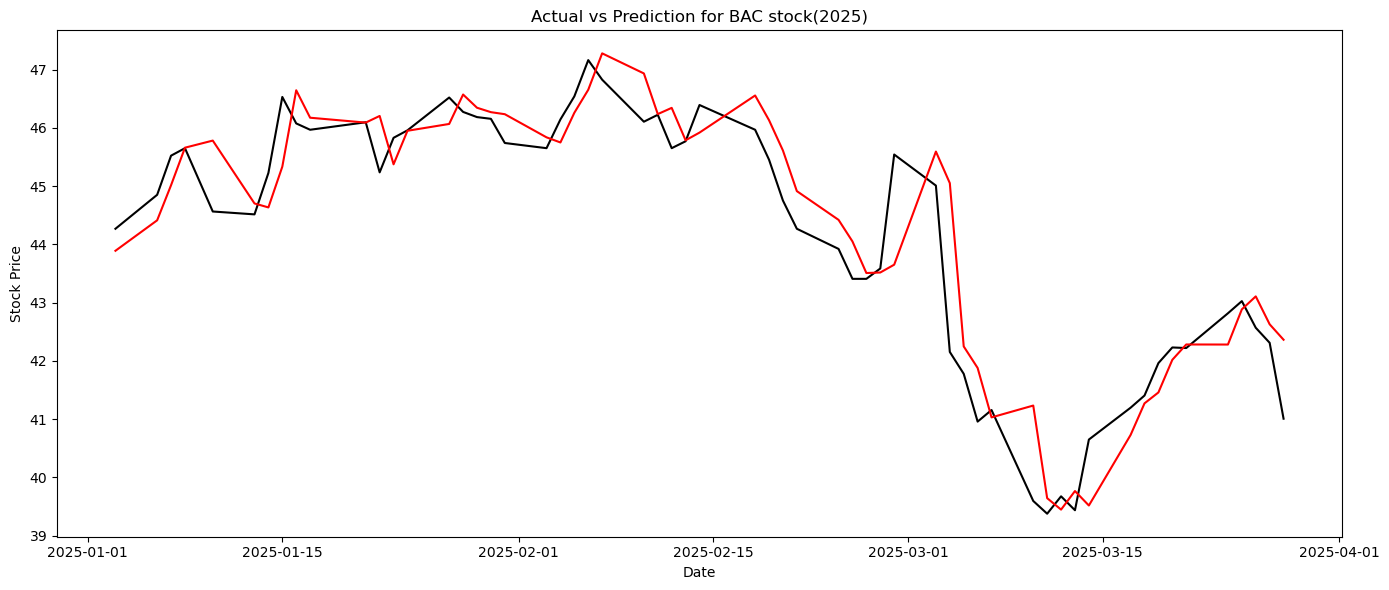

In [287]:
# Actual vs predicted value

import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Prediction', color = 'red')
plt.title('Actual vs Prediction for BAC stock(2025)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

In [288]:
# Risk measures - 
# 1) RMSE - Root Mean Squared Error
# 2) MSE - Mean Squared Error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_result['Actual'], df_result['Predicted'])
rmse = np.sqrt(mse)
print(rmse, mse)

0.7357826922067675 0.5413761701510388


In [280]:
# Based on the RMSE of 0.7358 and MSE of 0.5414 - 
# - the model demonstrates a moderate level of prediction error,
# with an average deviation of about 0.74 units from actual values.
# These metrics indicate that the model is performing reasonably well,
# but there may still be room for further optimization depending on the scale of the target variable.